# **Part 1 - Audio Transcript**

## **Section 1 - Setup**
First, we need to mount this notebook to our Google Drive folder, in order to access the Audio data files.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np                     # import numpy for numerical operation
import librosa                         # import librosa library for audio processing
import wave                            # import wave library for audio processing
import matplotlib.pyplot as plt        # import matplotlib for data visualisation
from IPython.display import Audio      # import IPython.display for playing audio
import warnings
warnings.filterwarnings('ignore')

## **Section 2 - Data Loading**
Now that Google Drive is mounted, we can access audio file within this notebook.

In [3]:
path = '/content/drive/MyDrive/Equity.wav'
path_ = '/content/drive/MyDrive/0eef5b7d-12a9-43ab-9460-bbd4d15098a4.wav'

In [4]:
def load_audio(audio_path):
  audio, sr = librosa.load(audio_path)
  return audio, sr

## **Section 3 - Data Analysis and Visualisation**
In this section, we will try to gain a description of the data, that is: Number of channels, Sample width, Sample Rate, and Number of frames.

In [5]:
def parameter(audio_path):
  obj = wave.open(audio_path, 'rb')
  print("Number of channels", obj.getnchannels())
  print("Sample width", obj.getsampwidth())
  print("Sample rate", obj.getframerate())
  print("Number of frames", obj.getnframes())
  obj.close()

In [6]:
parameter(path)

Number of channels 1
Sample width 2
Sample rate 8000
Number of frames 690095


In [7]:
parameter(path_)

Number of channels 1
Sample width 2
Sample rate 8000
Number of frames 1696896


Let's create some visualisation

In [8]:
def display_waveform(path):

  audio, sr = librosa.load(path)

  audio_widget = Audio(path)
  display(audio_widget)

  #Time_Domain
  plt.figure(figsize = (8,3))
  librosa.display.waveshow(audio, sr=sr)

  #Spectogram
  plt.figure(figsize=(8,3))
  x = librosa.stft(audio)
  xdb = librosa.amplitude_to_db(abs(x))
  librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
  plt.colorbar()

  plt.show()

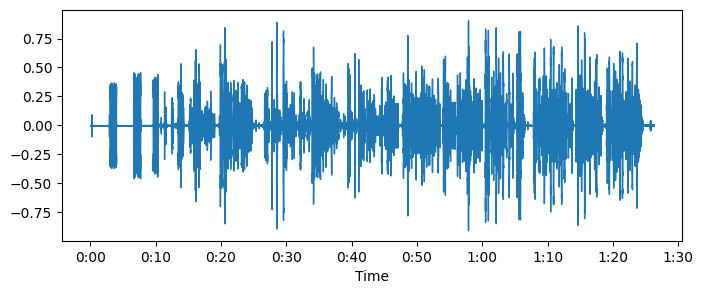

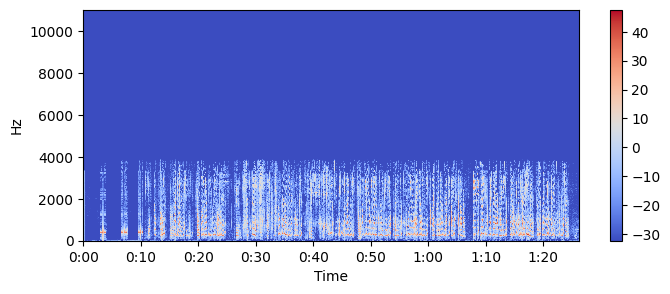

In [9]:
display_waveform(path)

## **Section 4 - Model Loading**
We will install whisper library from github and then load whisper large model for speech to text transcript.

In [10]:
!pip install git+https://github.com/openai/whisper.git -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 42.7 MB/s eta 0:00:00


In [13]:
model_l = whisper.load_model('large')

100%|█████████████████████████████████████| 2.88G/2.88G [00:31<00:00, 97.1MiB/s]


To work with audion file, we will need a package called whisper. We can install whisper with this command:

In [12]:
import whisper

## **Section 5 - Memory and Processing Efficiency**

Audio files can be quite large, especially when dealing with high-quality recordings or long-duration recordings. Processing such large files as a whole can be memory-intensive and might exceed the capabilities of the hardware.
By dividing the audio into smaller segments, you can process each segment individually. This reduces the memory footprint because you're working with smaller chunks of data at any given time.

In [14]:
audio = whisper.load_audio(path, sr=16000)  # A sampling rate of 16000 Hz is commonly used in audio processing because it strikes a balance between audio quality and processing requirements.

The segment_audio function is used to break down the noise-reduced audio into segments of a specified length (segment_length). Each segment is then processed independently for transcription using a speech-to-text model (model_l). This approach ensures that the transcription process is manageable and efficient, especially when dealing with potentially large audio files or real-time applications.

In [15]:
def segment_audio(audio, segment_length):
    segments = []
    for i in range(0, len(audio), segment_length):
        segments.append(audio[i:i + segment_length])
    return segments

In [16]:
# Define the segment length
segment_length = 16000 * 30

# Segment the audio
segments = segment_audio(audio, segment_length)

Here, 30 represents the number of seconds of audio that each segment should contain.
Multiplying 16000 (sampling rate in samples per second) by 30 (seconds) gives 480000 samples. would result in approximately 3 segments (86 / 30 = 2.8 segments plus a smaller segment for any remaining samples).

## **Section 6 - Transcription**
Let's transcript the audio but before data prepare data for neural networks.
We will use padding or trimming as whisper require inputs of a fixed length. This is because neural networks typically operate on batches of data where each input in the batch must have the same shape.
If the input audio segment does not match the expected length, it needs to be adjusted (either padded with zeros or trimmed) to fit the required length.

In [17]:
full_transcription = ""
for segment in segments:
    # Pad or trim the segment to ensure it's the right length
    segment = whisper.pad_or_trim(segment)

    # Transcribe the segment with the language set to Hindi
    result = model_l.transcribe(segment, language='hi', fp16=False)

    # Combine the transcription results
    full_transcription += result['text'] + " "

In [18]:
print(full_transcription.strip())

अजय को अलो अलो और गुड़ मॉर्निंग थे अगर मॉर्निंग थे मैं देपिका बात कर रही हूं सिर्फ चॉइस इक्विटी ब्रुकिंग से आप अभी ओनलाइन और फ्री डीमाट अकाउंट के लिए आप अकाउंट ओपन कर रहे थे ना सिर्फ फ्री डीमाट अकाउंट हाँ जी चॉइस इंडिया  आपको दिक्कत आ रहा है अन्य वेबसाइट के थ्रू आपको फॉर्म फिल करने में कुछ नहीं ओके ओके तो मैं आपको इसकी और कुछ दिटेल को बता देखूं कि यह इसमें और क्या क्या आगे डाक्यूमेंट लगेंगे आप बोलता हो प्रोसीट करेंगे आपको एक तो मेल आईडी आएंगे आपका कांटेक्ट नंबर वेरीफाइड का एक ओटीपी आएगा तो आपको वेरीफाइड करना पड़ेगा ठीक है जैसे वह पूछी जाएगा आपको बैंक डिटेल सबको मेंशन करने पड़ेंगे अ  आपका bank account कौन से bank से है IFC code and account number ये details के system में अगर ये details auto captured कर लेता है ऐसा आपके noun verification के साथ तो फिर आपका वहाँ पे passbook या पे cancel check के लिए नहीं पूछा जाएगा से अगर नहीं होता है वहाँ पे update तो आपको cancel check या पे passbook का photo upload करने का option आजाएगा से


In [19]:
trans_hindi_data_1 = full_transcription.strip()
trans_hindi_data_1

'अजय को अलो अलो और गुड़ मॉर्निंग थे अगर मॉर्निंग थे मैं देपिका बात कर रही हूं सिर्फ चॉइस इक्विटी ब्रुकिंग से आप अभी ओनलाइन और फ्री डीमाट अकाउंट के लिए आप अकाउंट ओपन कर रहे थे ना सिर्फ फ्री डीमाट अकाउंट हाँ जी चॉइस इंडिया  आपको दिक्कत आ रहा है अन्य वेबसाइट के थ्रू आपको फॉर्म फिल करने में कुछ नहीं ओके ओके तो मैं आपको इसकी और कुछ दिटेल को बता देखूं कि यह इसमें और क्या क्या आगे डाक्यूमेंट लगेंगे आप बोलता हो प्रोसीट करेंगे आपको एक तो मेल आईडी आएंगे आपका कांटेक्ट नंबर वेरीफाइड का एक ओटीपी आएगा तो आपको वेरीफाइड करना पड़ेगा ठीक है जैसे वह पूछी जाएगा आपको बैंक डिटेल सबको मेंशन करने पड़ेंगे अ  आपका bank account कौन से bank से है IFC code and account number ये details के system में अगर ये details auto captured कर लेता है ऐसा आपके noun verification के साथ तो फिर आपका वहाँ पे passbook या पे cancel check के लिए नहीं पूछा जाएगा से अगर नहीं होता है वहाँ पे update तो आपको cancel check या पे passbook का photo upload करने का option आजाएगा से'

Word Error Ratio Calculation:

To calculate the Word Error Rate (WER), we need the number of substitutions (S), deletions (D), insertions (I), and the total number of words in the reference (N).

From output:

Substitutions (S): 16 to 18 (let's take the midpoint, 17)
Deletions (D): 5 to 7 (let's take the midpoint, 8)
Insertions (I): 0 (assuming no extra words were added)
Total words in the reference (N): 191
Using the WER formula:

WER = S+D+I / N

WER = 0.13

So, the Word Error Rate (WER) is approximately 14%

# **Part 2 - Translation**

Transcript into English language.

In [20]:
full_transcription_eng = ""
for segment in segments:
    # Pad or trim the segment to ensure it's the right length
    segment = whisper.pad_or_trim(segment)

    # Transcribe the segment with the language set to Hindi
    eng_result = model_l.transcribe(segment, language='en', fp16=False)

    # Combine the transcription results
    full_transcription_eng += eng_result['text'] + " "

In [21]:
data_1 = full_transcription_eng.strip()

In [22]:
data_1

'Hello. Hello. Good morning, sir. Good morning. Sir, I am speaking to Deepika, sir, from Choice Equity Broking, sir. Yes, tell me. You are opening an account for an online free DMAT account, sir. Free DMAT account? Yes, sir.  Yes. So, are you facing any problem in filling the form through this website? No, nothing. Okay, okay. Sir, I will tell you some details about this. What other documents will be required in this? Yes, tell me. As you proceed further, you will get an OTP of your mail id and contact number to verify. So, you will have to verify it. Okay? Yes. You will get a receipt and you will have to mention the bank details.  Bank Account IFC Code and Account Number If this system auto-captures these details with your name verification then your passbook or cancel check will not be asked. If there is no update then you will get the option to upload the passbook or cancel check.'

# **Part 3 - Sentiment Analaysis**
## **Section 1 - Setup**
In order to view, analyse and manipulate the dataset, we must load it into something called a dataframe, which is a way of storing tabulated data in a virtual table. This dataframe will allow us to analyse the data freely. To load it into a dataframe, we will need a package called Pandas.

In [23]:
import pandas as pd

## **Section 2 - Data Loading**

In [24]:
df = pd.read_csv('/content/drive/MyDrive/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Using the `.head()` method allows us to see the top 5 (5 by default) rows within the dataframe. We can use `.tail()` to see the bottom 5.

## **Section 3 - Descriptive statistics**

In this section, we should try to gain a description of the data, that is: what columns are present, how many null values exist and what data types exists within each column.

After this, you should try to compute some descriptive statistics of the numerical columns within the dataset, such as:

- mean
- median
- count
- etc...

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [26]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [27]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

Column `ProfileName` and `Summary` has null values. Let's treat them. The quantity is very less so we can delete those rows.

After the we will look for duplicate values.

In [28]:
df.dropna(how='any', inplace=True)

In [29]:
df.drop_duplicates(inplace=True, subset=['Score', 'Text'])

Column `HelpfulnessNumerator` and `HelpfulnessDenominator` are of no use hence we will delete it.

In [30]:
idx = df[df["HelpfulnessNumerator"]>df["HelpfulnessDenominator"]].index
df.drop(index=idx, inplace=True)

Let set the score for sntiment analysis by changing score into classes like `Positive`, `Negative` and `Neutral`

In [31]:
def create_target(x):

    return "positive" if x>3 else "negative" if x<3 else "neutral"

In [32]:
df.loc[:, 'Target'] = df.Score.apply(create_target)

In [33]:
df[['Score', 'Target']].sample(5)

,Score,Target
128680,4,positive
297125,4,positive
96311,5,positive
101417,5,positive
11593,5,positive


## **Section 4 - Visualisation**
let's create some visualisations. We will use`seaborn` package for visualisation.

In [34]:
import seaborn as sns

To analyse the dataset, below are snippets of code that you can use as helper functions to visualise different columns within the dataset. They include:

- get_unique_values = this is to show how many unique values are present within a column
- plot_categorical_distribution = this is to visualise the distribution of categorical columns

In [35]:
def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

In [36]:
get_unique_values(df, 'Target')

Column: Target has 3 unique values

Target
positive    306805
negative     57079
neutral      29770
Name: count, dtype: int64


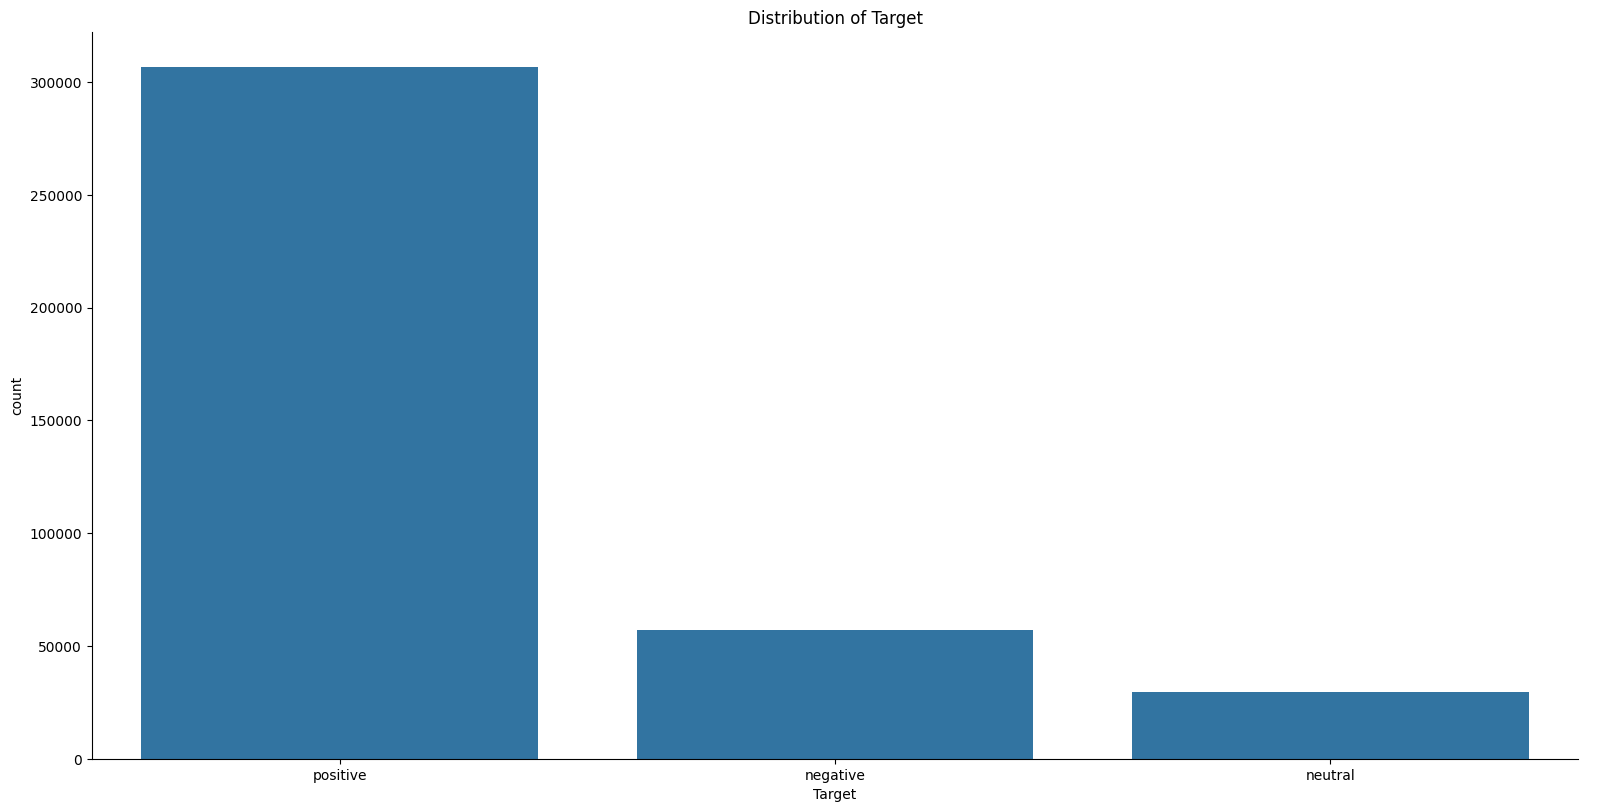

In [37]:
plot_categorical_distribution(df, 'Target')

The distribution of the target variable is uneven hence we will perform undersampling to balance the dataset.

In [38]:
neutral = df.loc[df.Target=='neutral']
negative = df.loc[df.Target=='negative'].sample(50000)
positive = df.loc[df.Target=='positive'].sample(50000)

df = pd.concat([positive, negative, neutral])

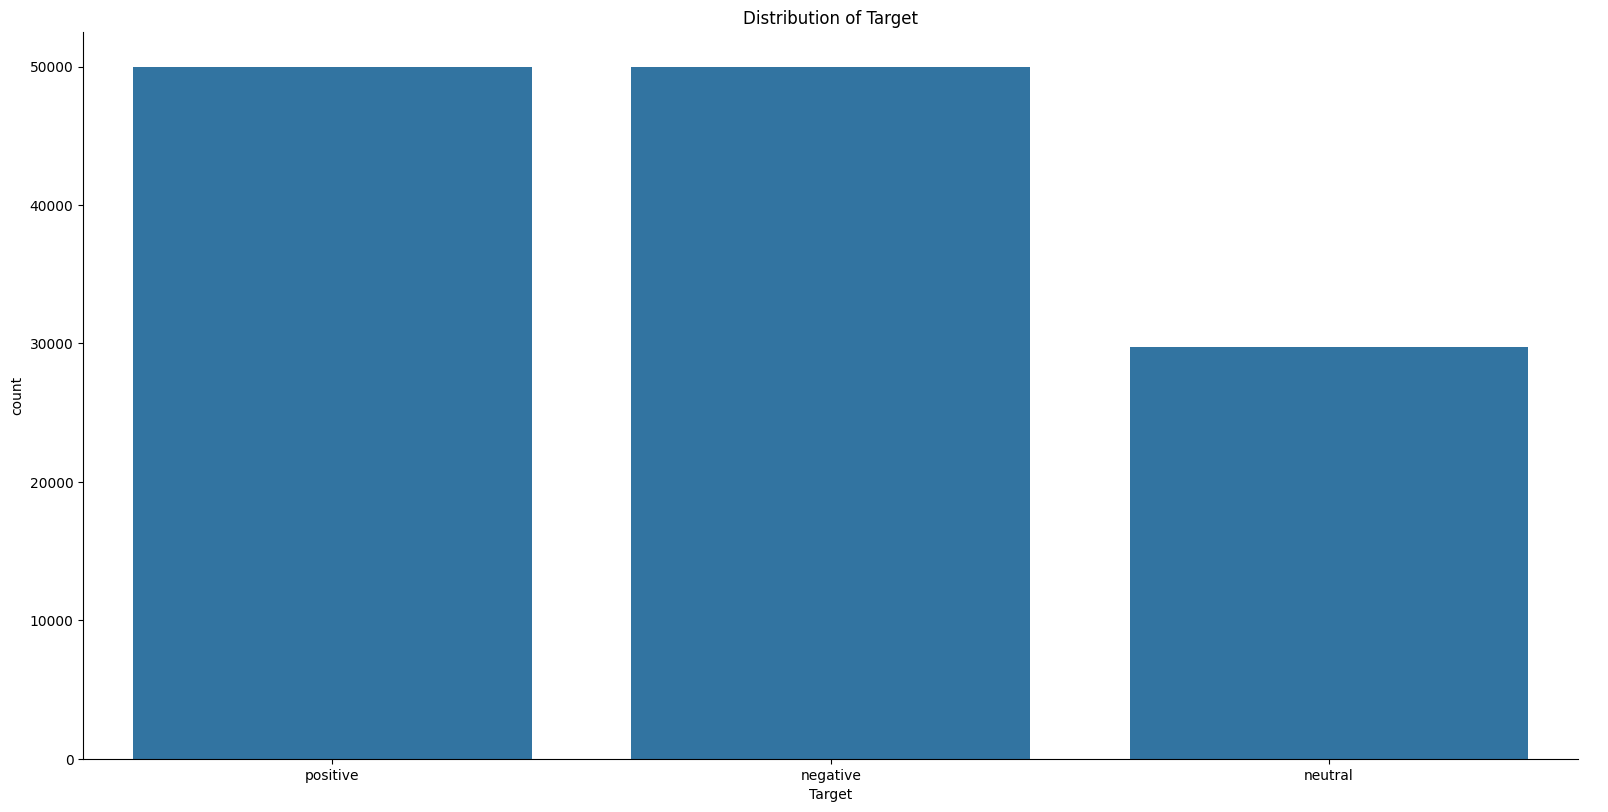

In [39]:
plot_categorical_distribution(df, 'Target')

## **Section 5 - Text Preprocessing**

The preprocessing function cleans and standardizes text data for natural language processing tasks.
To perform this task we will import some libraries.

In [40]:
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [41]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [42]:
def preprocessing(text, use_lemmatization=False):

    text = text.lower()

    text = re.sub(r'<.*?>', '', text)

    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    text = re.sub(r'[^a-z\s]', '', text)

    words = word_tokenize(text)

    stop_words = set(stopwords.words("english"))

    words = [word for word in words if word not in stop_words]

    #lemmatizer = WordNetLemmatizer()
    #words = [stemmer.stem(word) for word in words]

    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    return " ".join(words)

In [43]:
df.Text = df.Text.apply(preprocessing)
df.Text.iloc[6]

'good cereal great qualiti great price simpl add want tast requir'

## **Section 6 - Data Modelling**
First we will prepare a data for model. This include:
- Split data into trainig and testing
- Tfidf vectorization
- Label Encoding

To peform above task we require some libraries called `train-test-split`, `TfidfVectorizer` and `sklearnpreprocessing`

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [45]:
X = df.Text
y = df.Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1, stratify=y)

In [46]:
tfidf_vec = TfidfVectorizer(max_features = 10000)
tfidf_vec.fit(X_train)

tfidf_vec_X_train = tfidf_vec.transform(X_train)
tfidf_vec_X_test = tfidf_vec.transform(X_test)

In [47]:
labelEncoder = LabelEncoder()

y_train = labelEncoder.fit_transform(y_train)
y_test = labelEncoder.transform(y_test)

labels = labelEncoder.classes_.tolist()
print(labels) # index-> class

['negative', 'neutral', 'positive']


Now we will try to build logict regression model on data and validate it.

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
C = [0.001, 0.01, 0.1, 1, 10]

for c in C:
    # Define model
    log_model = LogisticRegression(C=c, max_iter=500, random_state=1)

    # Training
    log_model.fit(tfidf_vec_X_train, y_train)

    # Predictions
    y_preds_train = log_model.predict(tfidf_vec_X_train)
    y_preds_test = log_model.predict(tfidf_vec_X_test)

    # Evaluation
    print()
    print(f"Logistic Regression Model with C={c}")
    print(f"Train accuracy score: {accuracy_score(y_train, y_preds_train)}")
    print(f"Test accuracy score: {accuracy_score(y_test, y_preds_test)}")
    print('\n', 40*'-')


Logistic Regression Model with C=0.001
Train accuracy score: 0.641981968097403
Test accuracy score: 0.6370501656777375

 ----------------------------------------

Logistic Regression Model with C=0.01
Train accuracy score: 0.6749056022193111
Test accuracy score: 0.66779687138784

 ----------------------------------------

Logistic Regression Model with C=0.1
Train accuracy score: 0.7278743160977114
Test accuracy score: 0.713570162595361

 ----------------------------------------

Logistic Regression Model with C=1
Train accuracy score: 0.7602296370501657
Test accuracy score: 0.7200431532711721

 ----------------------------------------

Logistic Regression Model with C=10
Train accuracy score: 0.7818159050628034
Test accuracy score: 0.7067889342683209

 ----------------------------------------


It's time to make prediction on transcript data.

In [59]:
processed_new_data = preprocessing(data_1)
tfidf_vec_new_data = tfidf_vec.transform([processed_new_data])
new_pred = log_model.predict(tfidf_vec_new_data)
print(f"Prediction for transcipt data_1 is: {new_pred[0]}")

Prediction for transcipt data_1 is: 0


# **Part 4 - Text Summarization**

In order to summarize a data, we must load `sumy` library with other coresponding libraries for test preprocessing.

In [52]:
pip install sumy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 79.1 MB/s eta 0:00:00
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21693 sha256=c12abf5afdaecc12aa4c9f35e067a4a6e24b8d0acce7cc98bd5d521812427635
  Stored in directory: /root/.cache/pip/wheels/64/22/90/b84fcc30e16598db20a0d41340616dbf9b1e82bbcc627b0b33
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=1237d27d958be3c24a892e779cc51e11b0203dd4434303b83050557e4b7103f7
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built breadability docopt


In [53]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

In [54]:
data_to_summarize = data_1

In [57]:
# Initialize the parser with the text
parser = PlaintextParser.from_string(data_to_summarize, Tokenizer("english"))

# Initialize the LSA (Latent Semantic Analysis) Summarizer
summarizer = LsaSummarizer()

# Summarize the text to 20% of the original length
summary = summarizer(parser.document, sentences_count=1)

# Print the summarized text
for sentence in summary:
    print(sentence)

So, are you facing any problem in filling the form through this website?
